# Decision Tree VAL

### Dataframe creation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train_cleaned_kmeans8.csv")
df.head()

name  duration_ms  explicit  popularity  \
0                             Long Road       241760         0          46   
1  Daniâl My Son, Where Did You Vanish?       444000         0           0   
2                    Ondskapens Galakse       333506         0           3   
3                       Can't Look Away       269800         0          23   
4                         Thunderground       307651         0          25   

                  artists              album_name  danceability  energy  key  \
0           Funki Porcini           Hed Phone Sex         0.690   0.513    5   
1           Siavash Amini    A Trail of Laughters         0.069   0.196    1   
2               Kvelertak              Nattesferd         0.363   0.854    2   
3       The Wood Brothers       One Drop of Truth         0.523   0.585    5   
4  The Darkraver;DJ Vince  Happy Hardcore Top 100         0.643   0.687    7   

   loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
0   -12.529       0.0975      0.302000           0.53600     0.281   0.6350   
1   -24.801       0.0805      0.283000           0.93400     0.360   0.0336   
2    -7.445       0.0397      0.000089           0.80000     0.262   0.4890   
3    -5.607       0.0765      0.066400           0.00127     0.117   0.3850   
4   -11.340       0.0539      0.000576           0.09690     0.299   0.6370   

     tempo  time_signature        genre  kmeans.labels_  
0  142.221             4.0      j-dance               2  
1   75.596             4.0      iranian               7  
2  116.628             4.0  black-metal               6  
3  140.880             4.0    bluegrass               5  
4  143.956             4.0        happy               1

### Partitioning

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df = df.replace({"explicit": {False:0, True:1}})

In [6]:
attributes = ['danceability', 'tempo', 'energy','loudness','acousticness','speechiness','instrumentalness','liveness','valence','key']

In [7]:
attributes

['danceability',
 'tempo',
 'energy',
 'loudness',
 'acousticness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'key']

In [8]:
X = df[attributes].values
y = df["kmeans.labels_"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333333333333333333, random_state=1, stratify=y)

In [10]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### Decision Tree Classifier Pre-Pruning parameters

max_depths = [None] + list(np.arange(2, 20))
avg_scores = list()
std_scores = list()

for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='gini',max_depth=max_depth)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(max_depths)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

min_samples_splits = [2, 5, 10, 20, 30, 50, 100]
avg_scores = list()
std_scores = list()

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='gini',min_samples_split=min_samples_split)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_splits)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

min_samples_leafs = [1, 5, 10, 15, 20, 25, 30, 35, 40, 50, 100]
avg_scores = list()
std_scores = list()

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='gini',min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_leafs)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show()

### Decision Tree

In [11]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20, max_depth=12, min_samples_split=50)

In [12]:
%%time
dt.fit(X_train, y_train)

CPU times: total: 31.2 ms
Wall time: 101 ms


DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=20,
                       min_samples_split=50)

In [13]:
%%time
plt.figure(figsize=(20, 8), dpi=900)
plot_tree(dt, feature_names=attributes, filled=True)
#plt.savefig('Decision tree VAL.png')
plt.show()

CPU times: total: 5.39 s
Wall time: 11.7 s


### Scores and Heatmap

In [14]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [15]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [16]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.937
Train F1-score [0.93240093 0.92965434 0.95838484 0.93921139 0.91363851 0.929837
 0.95011086 0.94542091]

Test Accuracy 0.9166
Test F1-score [0.91015169 0.92094146 0.94693878 0.91048035 0.90786948 0.89481066
 0.92865232 0.91836735]


In [17]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       424
           1       0.92      0.92      0.92       832
           2       0.94      0.95      0.95       611
           3       0.90      0.92      0.91       905
           4       0.91      0.91      0.91       521
           5       0.88      0.91      0.89       700
           6       0.96      0.90      0.93       458
           7       0.94      0.90      0.92       549

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



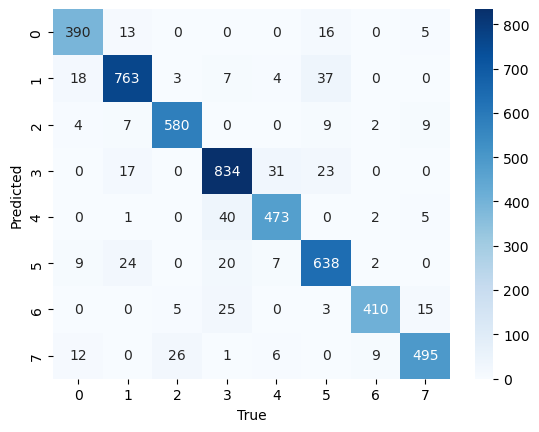

In [18]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Blues", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

### ALPHA

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

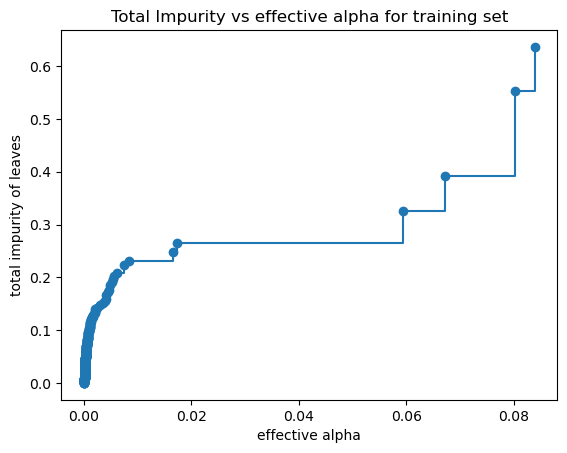

In [19]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [20]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.11508995353630141


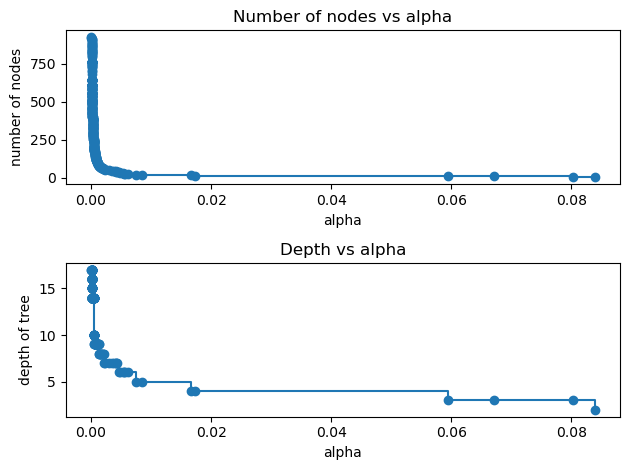

In [21]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [22]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

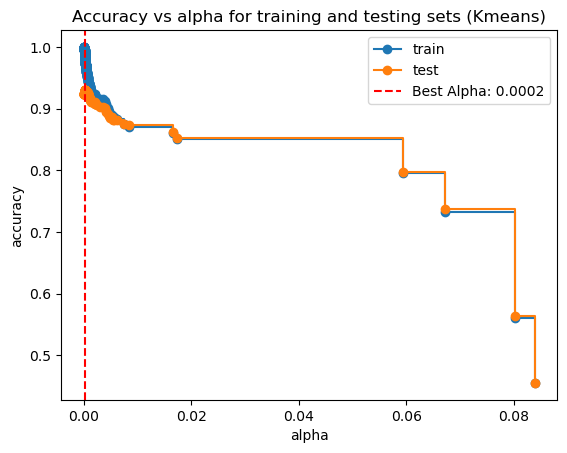

In [23]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets (Kmeans)")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()

# Find the index where the maximum testing accuracy occurs
best_alpha_idx = test_scores.index(max(test_scores))

# Draw a vertical line at the corresponding alpha value
best_alpha = ccp_alphas[best_alpha_idx]
ax.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best Alpha: {best_alpha:.4f}')
ax.legend()

plt.show()

### Post-Pruned Classification 

In [24]:
dtp = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0004,criterion='entropy', min_samples_leaf=5, max_depth=15, min_samples_split=5)
dtp.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0004, criterion='entropy', max_depth=15,
                       min_samples_leaf=5, min_samples_split=5, random_state=0)

In [25]:
y_test_pred = dtp.predict(X_test)

In [26]:
y_test.shape

(5000,)

In [27]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.937
Train F1-score [0.93240093 0.92965434 0.95838484 0.93921139 0.91363851 0.929837
 0.95011086 0.94542091]

Test Accuracy 0.928
Test F1-score [0.93208431 0.93293413 0.95652174 0.92290627 0.92649903 0.90740741
 0.92825112 0.92098093]


In [28]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       424
           1       0.93      0.94      0.93       832
           2       0.94      0.97      0.96       611
           3       0.93      0.92      0.92       905
           4       0.93      0.92      0.93       521
           5       0.90      0.91      0.91       700
           6       0.95      0.90      0.93       458
           7       0.92      0.92      0.92       549

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



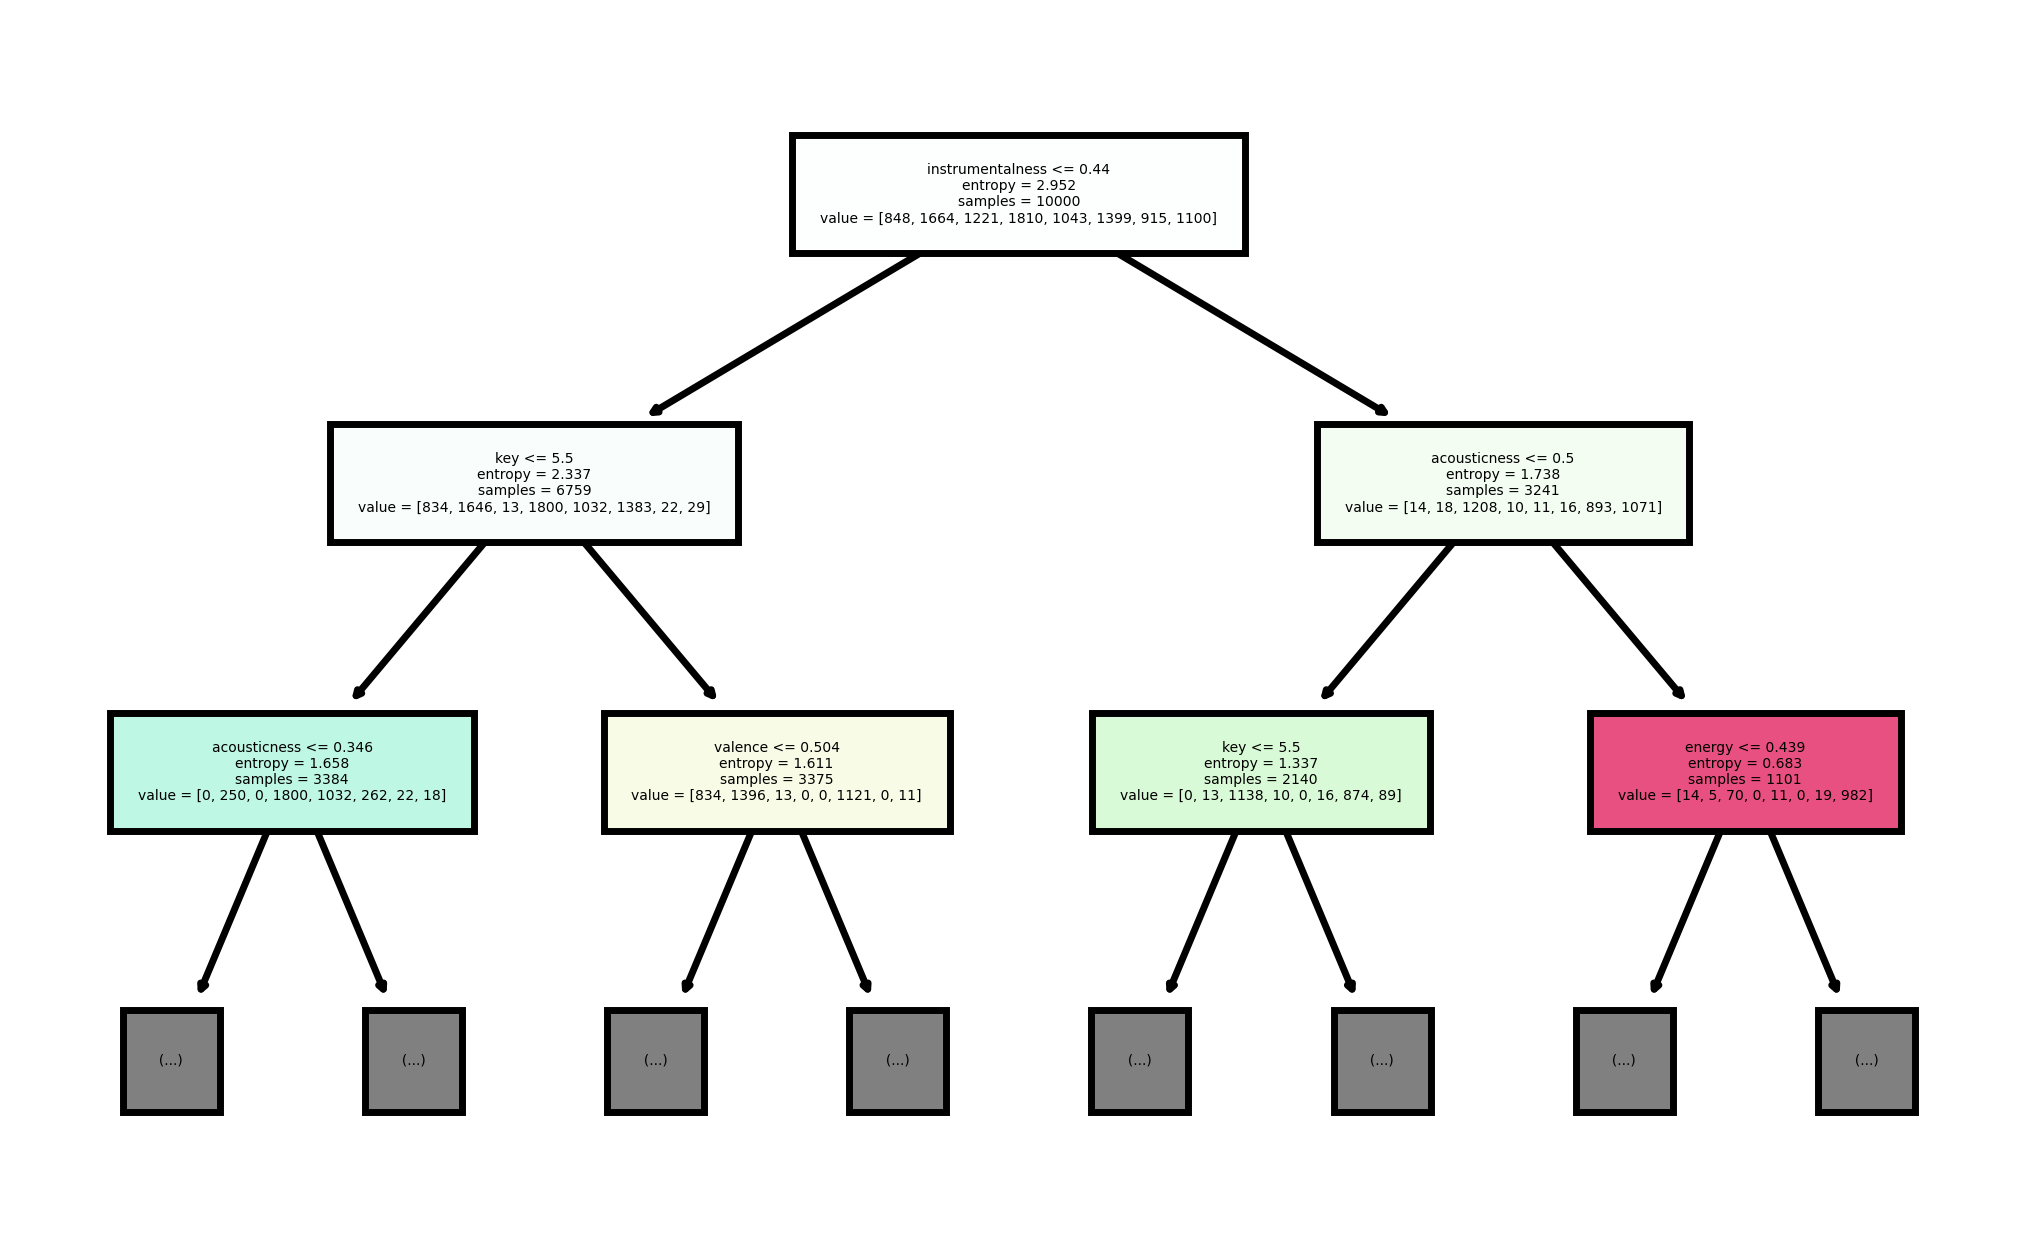

In [29]:
plt.figure(figsize=(5, 3), dpi=500)
plt.title('Decision Tree for Genres (Validation)')
plot_tree(dtp, max_depth=2, feature_names=attributes, filled=True, fontsize=2)
#plt.savefig('DT VAL Kmeans4 PostP.png')
plt.show()

### Model Evaluation

In [30]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

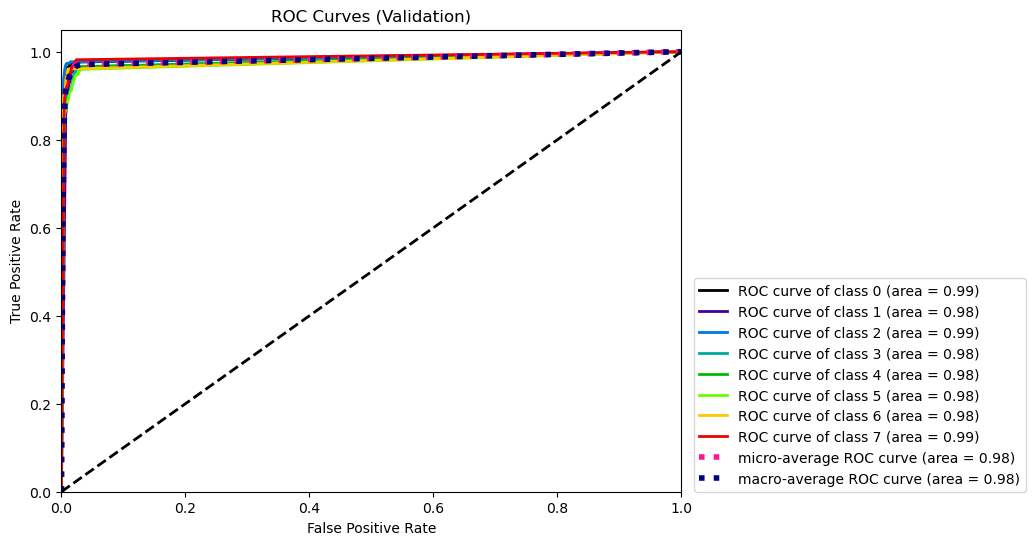

In [31]:
plot_roc(y_test, dtp.predict_proba(X_test), figsize=(8,6))
plt.title('ROC Curves (Validation)')
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)
plt.show()

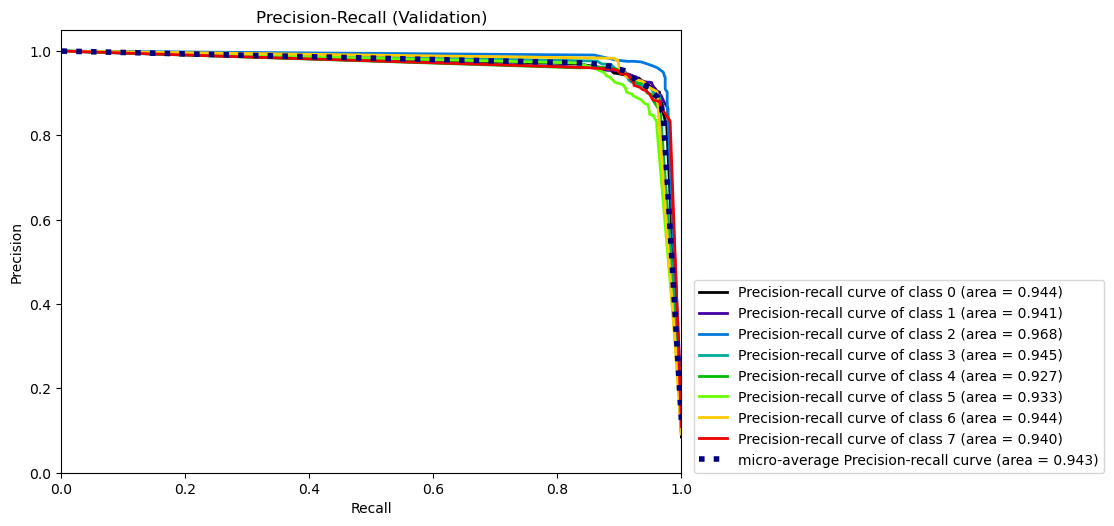

In [32]:
plot_precision_recall(y_test, dtp.predict_proba(X_test), figsize=(8,5.75))
plt.title('Precision-Recall (Validation)')
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)
plt.show()

### Feature Importance

In [33]:
zipped = zip(attributes, dtp.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

instrumentalness 0.29954100486578783
key 0.2730250440687018
acousticness 0.2176764826940577
valence 0.1195657158144268
energy 0.06327174785598944
danceability 0.016862099445799743
liveness 0.004916074307814493
loudness 0.0023159529179935055
tempo 0.0016664640248858487
speechiness 0.0011594140045427714


In [34]:
dt.feature_importances_

array([1.31205535e-02, 4.86586795e-04, 5.84474828e-02, 1.95983467e-04,
       2.19141086e-01, 0.00000000e+00, 3.08766084e-01, 1.07528111e-03,
       1.17783189e-01, 2.80983753e-01])

In [35]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [36]:
dt.predict_proba(X_test)

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.75      , 0.        , ..., 0.25      , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.74468085, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.125     , 0.        , ..., 0.04166667, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [37]:
from sklearn.metrics import precision_score
precision_score(y_test,y_test_pred, average='micro')

0.928

In [38]:
precision_score(y_test,y_test_pred, average='macro')

0.9292487472606542

In [39]:
feature_importance = pd.DataFrame(dt.feature_importances_, index = attributes).sort_values(0, ascending=False)
feature_importance

0
instrumentalness  0.308766
key               0.280984
acousticness      0.219141
valence           0.117783
energy            0.058447
danceability      0.013121
liveness          0.001075
tempo             0.000487
loudness          0.000196
speechiness       0.000000

<Axes: title={'center': 'Feature importance (Kmeans - post pruned)'}>

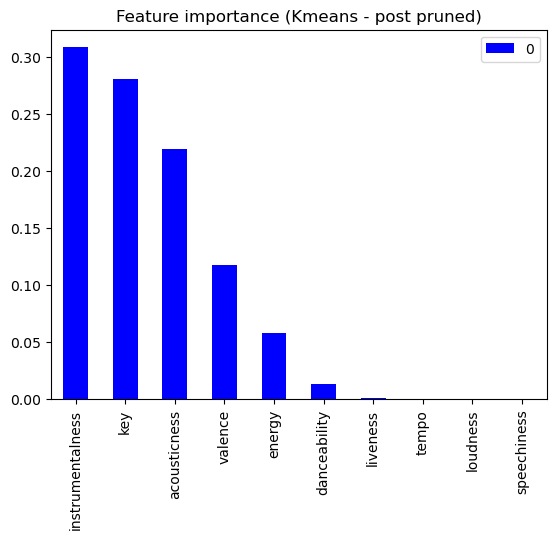

In [40]:
feature_importance.plot(kind='bar', color='blue', title='Feature importance (Kmeans - post pruned)')

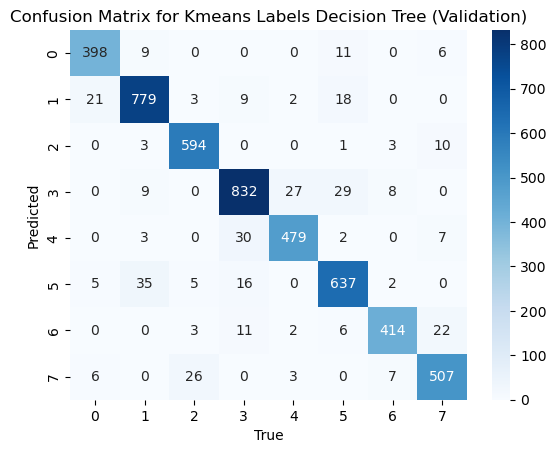

In [41]:
cf = confusion_matrix(y_test, y_test_pred)
plt.title('Confusion Matrix for Kmeans Labels Decision Tree (Validation)')
sns.heatmap(cf, annot=True, cmap="Blues", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()